# Importing Libraries and Datasets

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [10]:
data = pd.read_csv('D:\DS with Py\Data Science Datasets\onlinefraud.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Visualization

In this section, we will try to understand and compare all columns. 

Let’s count the columns with different datatypes like Category, Integer, Float. 

In [13]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

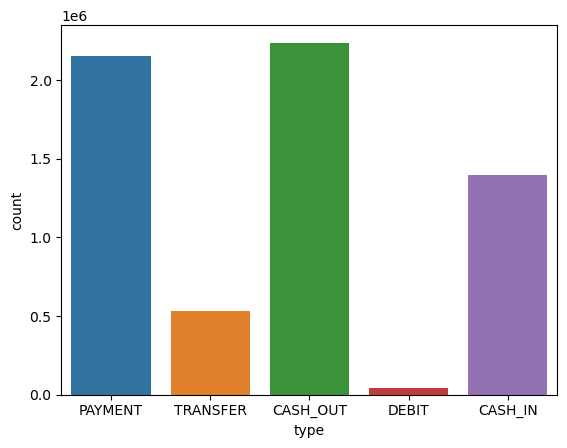

In [14]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

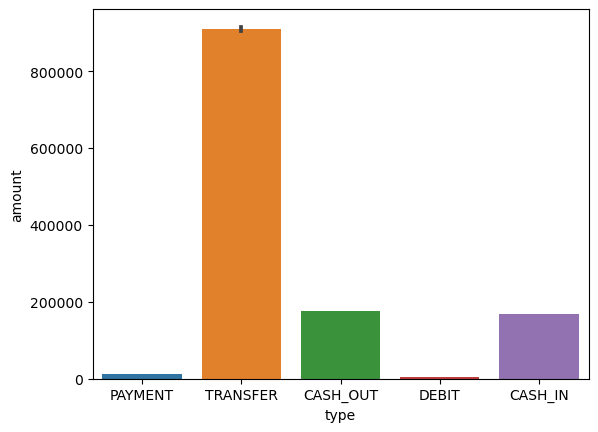

In [26]:
sns.barplot(x='type', y='amount', data=data)


In [17]:
data['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

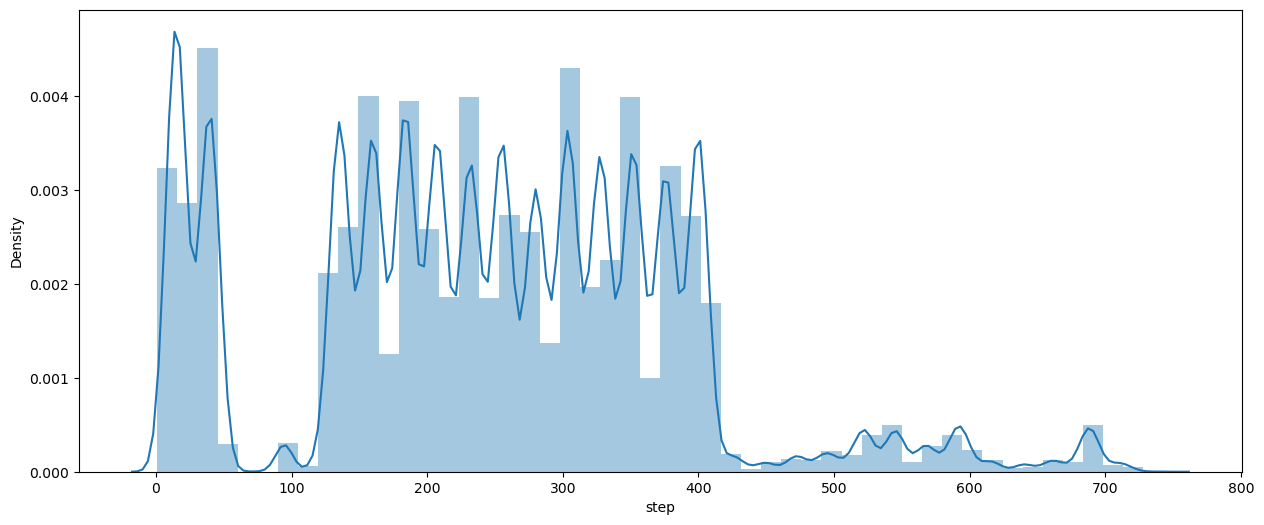

In [25]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


# Data Preprocessing

This step includes the following : 

Encoding of Type column
Dropping irrelevant columns like nameOrig, nameDest
Data Splitting

In [19]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [20]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [21]:
X.shape, y.shape


((6362620, 11), (6362620,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


# Model Training

As the prediction is a classification problem so the models we will be using are :

LogisticRegression :  It predicts that the probability of a given data belongs to the particular category or not.

RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.

In [23]:
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [24]:
models = [LogisticRegression(),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy', 
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')
	
	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))
	
	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()


LogisticRegression() : 
Training Accuracy :  0.8873978968280717
Validation Accuracy :  0.8849950606636293

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  0.9999992846155892
Validation Accuracy :  0.9635718404867615

